IS 675: Data Mining
Summer 2019
## Homework Assignment 6 
(Due July, 21 2019, midnight EST)



1. Load the iris dataset. (10 points)
2. Select the first 100 data that has two classes. Select the first two predicting attributes and the class attribute.  10 points)
3. Create a linear SVM and fit the data. (10 points)
4. Create a function to plot the points color-coded by the class values, the decision boundary, and the support vectors. (30 points)
5. Plot the data using the function. (10 points)
6. Divide the data into two sets: train (75%) and test (25%). (10 points)
7. Fit the training data using a linear SVM. (10 points)
8. Predict the labels for the test data and compare the results. (10 points)
9. Extra credit: Plot the training data using the function created in question #4 and plot the test data as stars as shown in the lecture slides. (20 points)


In [1]:
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1. Load the iris dataset. (10 points)


In [2]:
iris_dataset = datasets.load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 2. Select the first 100 data that has two classes. Select the first two predicting attributes and the class attribute.  10 points)



In [3]:
data = iris_dataset.data[:100,:2]
target = iris_dataset.target[:100]
print('Data Shape: ', data.shape, ' Target Shape: ', target.shape)

Data Shape:  (100, 2)  Target Shape:  (100,)


## 3. Create a linear SVM and fit the data. (10 points)


In [4]:
linear_svm = svm.LinearSVC()
linear_svm.fit(data, target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## 4. Create a function to plot the points color-coded by the class values, the decision boundary, and the support vectors. (30 points)


In [8]:
def plot_svm(model, data_points, targets, title):
    h=.02
    fig, axes = plt.subplots()
    X, Y = data_points[:, 0], data_points[:, 1]

    x_min = X.min() - 1
    x_max = X.max() + 1
    y_min = Y.min() - 1
    y_max = Y.max() + 1
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
    Z = Z.reshape(x_grid.shape)
    contour = axes.contourf(x_grid, y_grid, Z, 
                            cmap=plt.cm.coolwarm, alpha=0.8)
    
    axes.scatter(X, Y, c=targets, 
                 cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
    axes.set_title(title)
    return plt, axes
    

## 5. Plot the data using the function. (10 points)


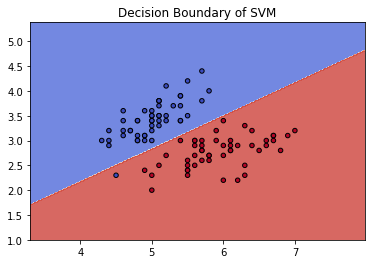

In [9]:
plot, axes = plot_svm(linear_svm, data, target, 
                     'Decision Boundary of SVM')
plot.show()

## 6. Divide the data into two sets: train (75%) and test (25%). (10 points)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.25)

## 7. Fit the training data using a linear SVM. (10 points)


In [11]:
linear_svm_2 = svm.LinearSVC()
linear_svm_2.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## 8. Predict the labels for the test data and compare the results. (10 points)


In [12]:
predictions = linear_svm_2.predict(x_test)
linear_svm_2.score(x_test, y_test)

1.0

## 9. Extra credit: Plot the training data using the function created in question #4 and plot the test data as stars as shown in the lecture slides. (20 points)


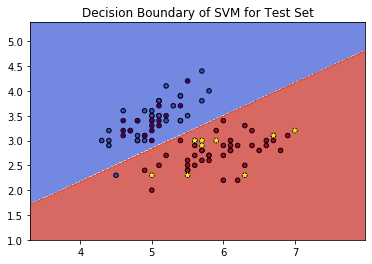

In [13]:
plot, axes = plot_svm(linear_svm_2, data, target, 
                      'Decision Boundary of SVM for Test Set')
X, Y = x_test[:, 0], x_test[:, 1]

axes.scatter(X, Y, c=y_test, marker='*', s=20)
plot.show()